In [1]:
using PyPlot
using Images
using MaxwellFrequency
using jInv.Mesh
using jInv.Utils
using jInv.LinearSolvers
using KrylovMethods
using JTetra

  likely near C:\Users\Wenke\.julia\v0.5\MaxwellUtils\src\readDataFiles.jl:35
  likely near C:\Users\Wenke\.julia\v0.5\MaxwellUtils\src\readDataFiles.jl:35
  likely near C:\Users\Wenke\.julia\v0.5\MaxwellUtils\src\readDataFiles.jl:35
  likely near C:\Users\Wenke\.julia\v0.5\MaxwellUtils\src\readDataFiles.jl:35
  likely near C:\Users\Wenke\.julia\v0.5\MaxwellUtils\src\readDataFiles.jl:61
  likely near C:\Users\Wenke\.julia\v0.5\MaxwellUtils\src\readDataFiles.jl:145
  likely near C:\Users\Wenke\.julia\v0.5\MaxwellUtils\src\readDataFiles.jl:198


# Module JTetra
The module `JTetra` enables the use of tetrahedral meshes within the `jInv` package. The following example shows how to set up an electromagnetic survey. 

## Reading tetrahedral mesh
A given tetrahedral mesh can be loaded by calling `getTetraMesh("points.txt", "tetras.txt")`. `points.txt` contains the nodes of the tetrahedral mesh. Each line of `points.txt` consists of three numbers: `x`-, `y`- and `z`-coordinate of the node. `tetras.txt` is the connectivity map of the tetrahedral mesh. Each line of `tetras.txt` consists of four integer numbers, the nodes that represent one tetrahedron.

In [2]:
mesh = getTetraMesh("points.txt", "tetras.txt")

JTetra.TetraMesh([-1024.0 -1024.0 -1024.0; -768.0 -1024.0 -1024.0; … ; 768.0 1024.0 1024.0; 1024.0 1024.0 1024.0],[1 2 10 82; 2 3 11 83; … ; 16749 16821 16829 16830; 16750 16822 16830 16831],97960,196304,115174,16831,0×0 sparse matrix with 0 Float64 nonzero entries,0×0 sparse matrix with 0 Float64 nonzero entries,0×0 sparse matrix with 0 Float64 nonzero entries,Float64[],Float64[],Float64[],[1 2 10; 1 2 82; … ; 16821 16829 16830; 16822 16830 16831],[1 2; 1 10; … ; 16829 16830; 16830 16831])

The tetrahedral mesh consists of fine cells along the receiver profiles and it coarsens further away from the survey area:

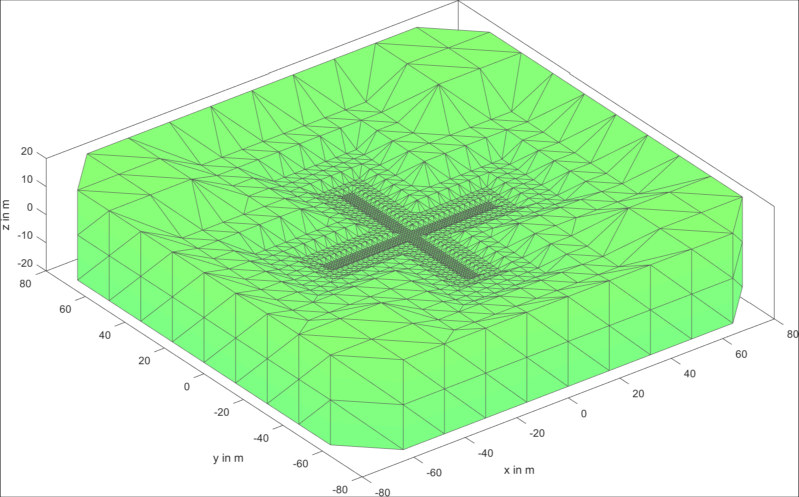

In [3]:
Images.load("mesh_xy.png")

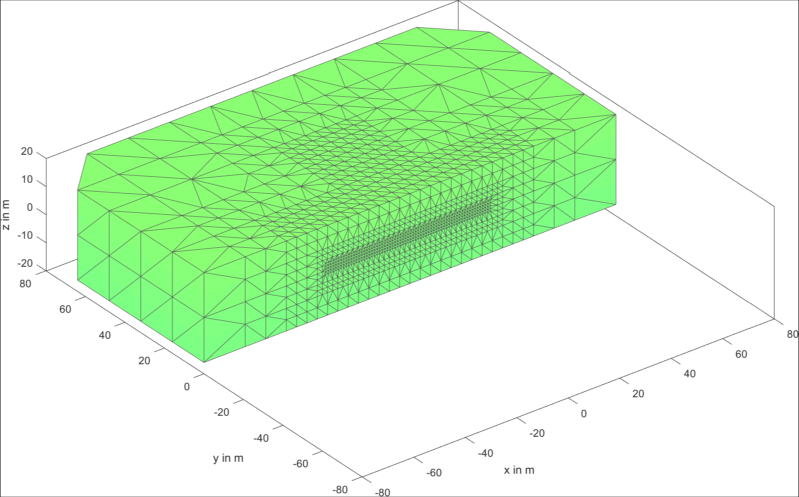

In [4]:
Images.load("mesh_xz.png")

## Defining conductivities, transmitter and receiver specifications
A homogeneous halfspace with a conductivity of `0.01 S/m` is defined. The transmitter is a dipole of `10 m` length in `x`-direction with its center at `[0,0,0]`. `61` receivers are located along two profiles in `x`- and `y`-direction, respectively. The source vector and the observation matrix are built using `getEdgeIntegralOfPolygonalChain`.

In [5]:
sigma = [0.01 * ones(mesh.nc, 3) zeros(mesh.nc, 3)] # isotropic conductivity

trx   = [                                           # one transmitter
  -5.0 0.0 0.0
   5.0 0.0 0.0]
rcvx  = [ [
  x-1.0 0.0 0.0
  x+1.0 0.0 0.0 ] for x = -30:30 ]
rcvy  = [ [
  -1.0 y 0.0
   1.0 y 0.0 ] for y = -30:30 ]
rcv   = [rcvx; rcvy]                                # 122 receivers

Sources = getEdgeIntegralOfPolygonalChain(mesh, trx, normalize=false)

Obs = spzeros(mesh.ne,length(rcv))
for i = 1:length(rcv)
  Obs[:,i] = getEdgeIntegralOfPolygonalChain(mesh, rcv[i], normalize=true)
end

## Solving

In [6]:
Fields   = zeros(Complex128, mesh.ne, size(Sources,2))
freq     = 1e2*2*pi                                # angular frequency
Ainv     = getMUMPSsolver([],1,0,2)
pFor     = getMaxwellFreqParam(mesh,Sources,Obs,Fields,freq,Ainv)

data, pFor = getData(sigma,pFor)                   # call getData
clear!(pFor.Ainv)

Fields = pFor.Fields                               # all DOFs

115174×1 Array{Complex{Float64},2}:
  2.13654e-10-1.51038e-8im
  -6.41171e-11+7.6568e-9im
 -1.49537e-10+7.44699e-9im
  -3.68947e-10-5.1209e-8im
 -1.91429e-11+1.60958e-8im
  6.85704e-10+7.22205e-9im
  -8.8687e-11+1.59491e-8im
  5.55277e-10+6.76108e-9im
   2.8944e-10+1.87959e-8im
  -5.96361e-9-8.71606e-8im
   1.79152e-9+4.13146e-8im
   2.38697e-9+7.24763e-9im
   1.63011e-9+4.10049e-8im
                      ⋮   
   1.79427e-9+4.13207e-8im
  6.86575e-10+7.22464e-9im
  -1.83363e-11+1.6098e-8im
  -6.3489e-11+7.65884e-9im
   4.14604e-9-1.69283e-8im
   5.48975e-9-5.12526e-8im
   -1.2022e-9-8.70195e-8im
  -1.13381e-8-1.12121e-7im
  -1.33897e-8-1.12173e-7im
  -5.97369e-9-8.71788e-8im
 -3.71818e-10-5.12151e-8im
  2.13108e-10-1.51049e-8im

## Plotting forward modeling results

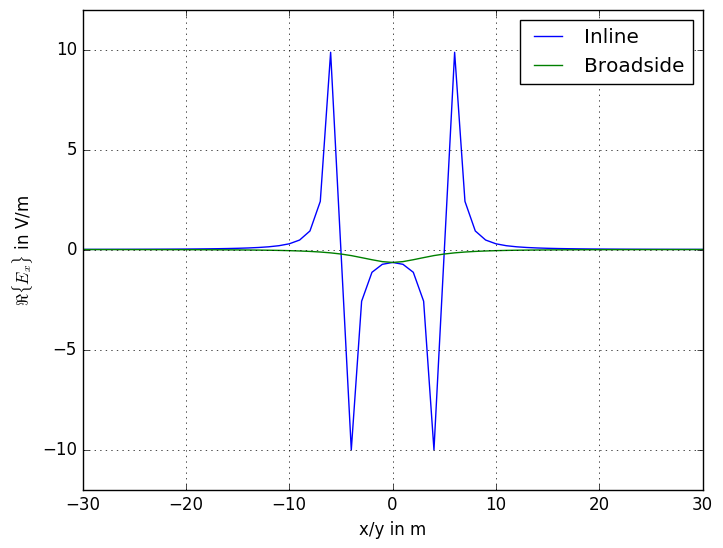

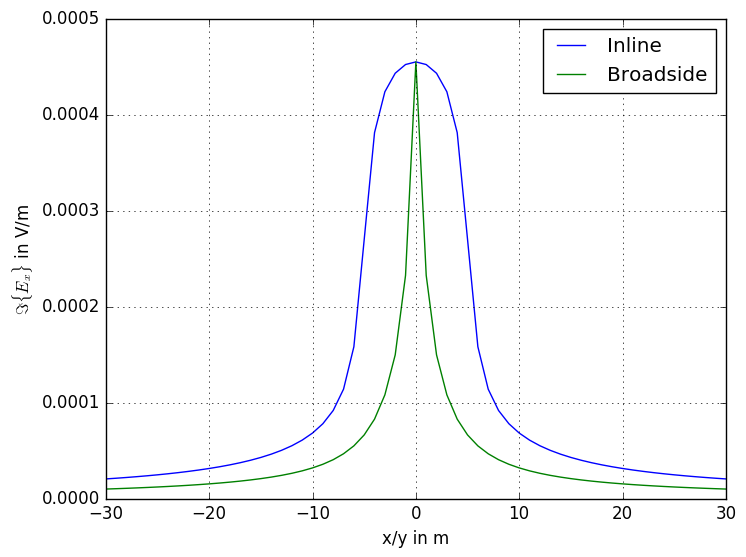

PyObject <matplotlib.text.Text object at 0x000000002865A5F8>

  likely near C:\Users\Wenke\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Wenke\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Wenke\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Wenke\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Wenke\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Wenke\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Wenke\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Wenke\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Wenke\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Wenke\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Wenke\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Wenke\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Wenke\.julia\v0.5\IJulia\src\kernel.jl:31
in show at C:\Users\Wenke\.julia\v0.5\PyCall\src\PyCall.jl
  likely near C:\Users\Wenke\.julia\v0.5\IJulia\src\kernel.jl:31
in show at C:\Users\Wenke\.juli

In [7]:
x = -30:30

figure(1)
plot(x,real(data[1:61]), label="Inline")
plot(x,real(data[62:2*61]), label="Broadside")
legend(loc="upper right")
grid(true)
xlabel("x/y in m")
ylabel("\$\\Re\\{E_x\\}\$ in V/m")
ylim([-12,12])

figure(2)
plot(x,imag(data[1:61]), label="Inline")
plot(x,imag(data[62:2*61]), label="Broadside")
legend(loc="upper right")
grid(true)
xlabel("x/y in m")
ylabel("\$\\Im\\{E_x\\}\$ in V/m")